In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sb
import numpy as np

In [53]:
filepath = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_02_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth")
spectra_df = pd.read_feather(filepath)
spectra_df

,x,y,1,2,3,4,5,6,7,8,...,450,451,452,453,454,455,456,457,458,459
0,434520.0,7178312.0,0.0,40.0,1.0,0.0,10.0,16.0,9.0,99.0,...,543.0,206.0,1925.0,4038.0,177.0,277.0,15000.0,6177.0,14263.0,15000.0
1,434547.0,7182759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,716.0,84.0,78.0,177.0,5043.0,448.0,1198.0,884.0,15000.0
2,434568.0,7175615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,444.0,537.0,1845.0,2488.0,4414.0,8398.0,15000.0,5799.0,13036.0,12053.0
3,434574.0,7181832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,859.0,800.0,1173.0,1171.0,2210.0,8807.0,12030.0,421.0,971.0,390.0
4,434574.0,7182653.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,140.0,128.0,1894.0,292.0,2506.0,961.0,11718.0,3565.0,3210.0,1549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,435651.0,7175093.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,...,987.0,411.0,8.0,407.0,17.0,27.0,6885.0,20.0,7805.0,5500.0
996,435653.0,7176429.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,45.0,...,309.0,756.0,1356.0,99.0,3842.0,7.0,10924.0,2363.0,8.0,12.0
997,435658.0,7175123.0,14.0,0.0,0.0,9.0,16.0,25.0,58.0,44.0,...,57.0,985.0,2433.0,2425.0,110.0,8402.0,4336.0,1508.0,14993.0,64.0
998,435660.0,7175115.0,0.0,0.0,0.0,3.0,0.0,0.0,12.0,83.0,...,1294.0,1382.0,2129.0,0.0,1.0,10992.0,4.0,6667.0,3.0,11515.0


In [34]:
def extract_spectra(df):
    spectra_forcorr = df.loc[:, df.columns[2:-10]]
    return spectra_forcorr.where(spectra_forcorr < 10000, 0.0)

In [35]:
spectra_forcorr = extract_spectra(spectra_df)
spectra_forcorr

,1,2,3,4,5,6,7,8,9,10,...,440,441,442,443,444,445,446,447,448,449
0,127.0,83.0,99.0,105.0,116.0,134.0,180.0,171.0,195.0,143.0,...,1085.0,325.0,1699.0,645.0,168.0,989.0,635.0,1423.0,3115.0,590.0
1,96.0,53.0,79.0,82.0,83.0,61.0,115.0,109.0,114.0,106.0,...,352.0,63.0,716.0,359.0,637.0,0.0,0.0,50.0,0.0,1482.0
2,381.0,450.0,439.0,507.0,496.0,478.0,610.0,623.0,636.0,659.0,...,1266.0,1611.0,250.0,1124.0,1206.0,1813.0,1483.0,1104.0,1624.0,876.0
3,103.0,109.0,101.0,133.0,136.0,148.0,184.0,159.0,182.0,167.0,...,516.0,781.0,57.0,474.0,198.0,236.0,192.0,386.0,936.0,417.0
4,111.0,92.0,86.0,99.0,107.0,122.0,147.0,167.0,167.0,145.0,...,843.0,1357.0,1094.0,701.0,1142.0,1254.0,641.0,1297.0,836.0,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57.0,43.0,28.0,26.0,44.0,45.0,91.0,68.0,51.0,73.0,...,2.0,2.0,916.0,125.0,3.0,15.0,327.0,3.0,3.0,3.0
996,106.0,94.0,34.0,45.0,36.0,62.0,79.0,101.0,94.0,68.0,...,354.0,138.0,209.0,0.0,432.0,286.0,349.0,428.0,0.0,0.0
997,54.0,34.0,32.0,0.0,4.0,24.0,33.0,55.0,41.0,40.0,...,151.0,0.0,302.0,15.0,36.0,5.0,38.0,0.0,846.0,12.0
998,119.0,88.0,49.0,77.0,75.0,103.0,117.0,85.0,90.0,133.0,...,0.0,0.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,922.0


In [36]:
sb.set(rc = {'figure.figsize':(18,15)})
sb.set_context("poster")
sb.set_style("white") 

<AxesSubplot:>

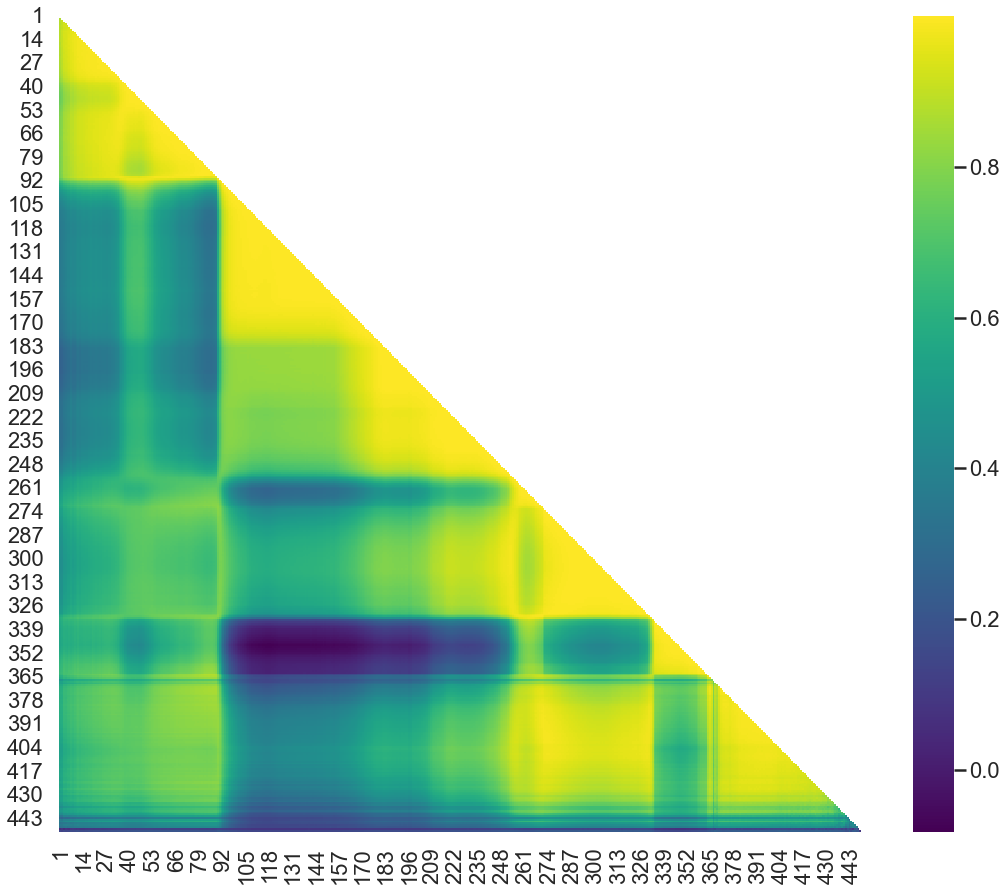

In [37]:
corr = spectra_forcorr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sb.heatmap(corr, cmap='viridis', mask=mask)

----

In [70]:
datadir = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/")
datafiles = datadir.glob("*.fth") 
datafiles = list(datafiles)
datafiles

[PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_03_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_01_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_02_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_04_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_05_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_06_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extract

In [71]:
dflist = [pd.read_feather(fn) for fn in datafiles]

dflist = list(map(extract_spectra, dflist))
full_df = pd.concat(dflist)
full_df

,1,2,3,4,5,6,7,8,9,10,...,440,441,442,443,444,445,446,447,448,449
0,9.0,31.0,0.0,0.0,38.0,25.0,82.0,84.0,105.0,126.0,...,335.0,503.0,332.0,327.0,111.0,521.0,217.0,350.0,519.0,141.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,...,277.0,244.0,239.0,0.0,213.0,555.0,491.0,456.0,60.0,664.0
2,0.0,0.0,1.0,0.0,0.0,0.0,5.0,6.0,14.0,10.0,...,546.0,361.0,434.0,123.0,211.0,908.0,163.0,1.0,1214.0,467.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,40.0,27.0,34.0,...,117.0,120.0,480.0,409.0,277.0,128.0,718.0,167.0,305.0,257.0
4,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,2.0,8.0,...,542.0,154.0,0.0,38.0,387.0,120.0,1162.0,147.0,1779.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,142.0,121.0,193.0,198.0,187.0,189.0,191.0,258.0,210.0,222.0,...,414.0,0.0,986.0,1026.0,650.0,163.0,487.0,0.0,0.0,278.0
996,52.0,66.0,59.0,89.0,75.0,74.0,106.0,108.0,101.0,142.0,...,62.0,569.0,0.0,212.0,172.0,0.0,595.0,206.0,0.0,899.0
997,0.0,30.0,4.0,18.0,23.0,25.0,69.0,47.0,24.0,47.0,...,0.0,0.0,0.0,429.0,0.0,0.0,256.0,0.0,0.0,0.0
998,110.0,66.0,33.0,21.0,79.0,85.0,72.0,80.0,120.0,73.0,...,68.0,227.0,214.0,71.0,615.0,1132.0,869.0,0.0,22.0,623.0


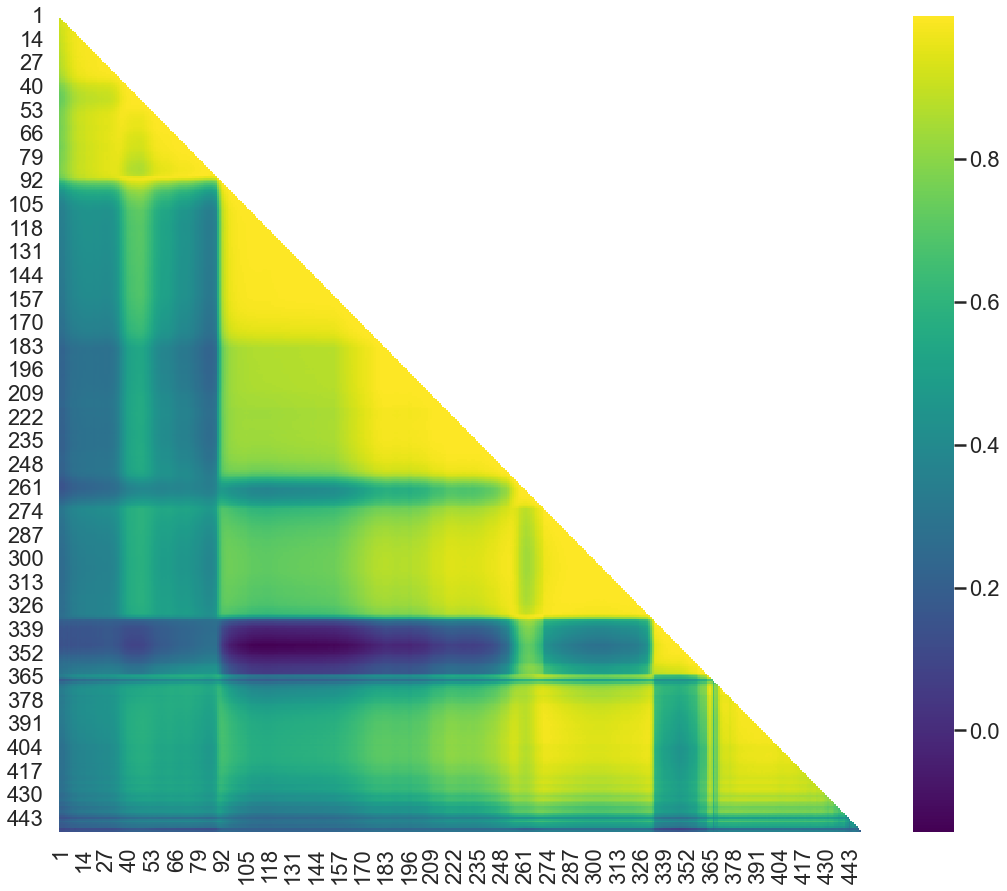

In [72]:
corr = full_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sb.heatmap(corr, cmap='viridis', mask=mask)